# Справочник класса DataSamples
## Создание экземпляра класса

In [1]:
import pandas as pd
from scorekit.data import DataSamples

df = pd.read_csv('data/train_titanic.csv')
ds = DataSamples(samples={'train': df},  # выборка для разработки. Задается в виде словаря {название_сэмпла: датафрейм}, может содержать любое кол-во сэмплов
                 target='Survived',              # целевая переменная
                 id_column='PassengerId',        # уникальный в рамках среза айди наблюдения
                 result_folder='titanic_output', # папка, в которую будут сохраняться все результаты работы с этим ДатаСэмплом
                 feature_descriptions=pd.read_excel('data/titanic_description.xlsx', index_col=0),  # датафрейм с описанием переменных. Должен содержать индекс с названием переменных и любое кол-во полей с описанием, которые будут подтягиваться в отчеты
                 features=None,                  # список переменных. При None берутся все поля числового типа и нечисловые (кроме target, time_column, id_column, weights) с кол-вом уникльных значений меньше min_nunique
                 cat_columns=None,               # список категориальных переменных. При None категориальными считаются все переменные с кол-вом уникальных значений меньше min_nunique
                 min_nunique=30,                 # кол-во уникальных значений, до которого переменная считается категориальной при автоматическом определении
                 time_column=None,               # дата среза
                 train_name=None,                # название сэмпла обучающей выборки. При None берется первый сэмпл
                 special_bins=None,              # словарь вида {название бина: значение}, каждое из значений которого помещается в отдельный бин
                 n_jobs=1,                        # кол-во используемых рабочих процессов, при -1 берется число, равное CPU_LIMIT
                 random_state=0                  # сид для генератора случайных чисел, используется во всех остальных методах, где необходимо
                 )

Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Selected categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


## 1. Переменные

In [2]:
# целевая переменная
ds.target 

'Survived'

In [3]:
# список переменных
ds.features 

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [4]:
# список категориальных переменных
ds.cat_columns 

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [5]:
# уникальный в рамках среза айди наблюдения
ds.id_column 

'PassengerId'

In [6]:
# дата среза
ds.time_column 

In [7]:
# название сэмпла обучающей выборки
ds.train_name

'train'

In [8]:
# выборка для разработки. Словарь вида {название_сэмпла: датафрейм}
ds.samples
# выборка трэйн
ds.samples[ds.train_name]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


In [9]:
# датафрейм с описанием переменных
ds.feature_descriptions 

,Описание переменной
feature,
Pclass,Класс пассажира
Sex,Пол
Age,Возраст
SibSp,Кол-во братьев и супругов на борту
Parch,Кол-во родителей и детей на борту
Fare,Плата за проезд
Embarked,Порт посадки


In [10]:
# папка, в которую будут сохраняться все результаты работы с этим ДатаСэмплом
ds.result_folder 

'titanic_output/'

In [11]:
# словарь вида {название бина: значение}, каждое из значений которого помещается в отдельный бин
ds.special_bins 

{}

In [12]:
# датафрейм, основа для нарезания подвыборок
ds.bootstrap_base 

In [13]:
# кол-во используемых рабочих процессов
ds.n_jobs 

1

In [14]:
# максимальный размер очереди для процессов
ds.max_queue 

2

In [15]:
# сид для генератора случайных чисел, используется во всех остальных методах, где необходимо
ds.random_state 

0

## 2. Методы

In [16]:
"""
Конвертирование ДатаСэмпла в датафрейм
:param sample_field: добавляемое поле, в которое будет записано название сэмплов

:return: датафрейм
"""
ds.to_df(sample_field='sample')        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sample
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,train
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S,train
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S,train
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C,train


In [17]:
"""
Вычисление статистики по сэмплам
:param out: название эксель файла для сохранения статистики
:param gini_in_time: флаг для расчета динамики джини по срезам. На больших выборках с бутстрэпом может занимать много времени
:param targettrend: название папки и листа в файле для сохранения графиков TargetTrend. При None TargetTrend не считается
"""
ds.stats(out=None, gini_in_time=True, targettrend=None)

                      train
amount                  891
target                  342
target_rate           0.384
period                   NA
features                  7
categorical features      5


In [18]:
"""
Вычисление джини всех переменных, словарь вида {название_сэмпла: {переменная: джини}} сохраняется в self.ginis
:param features: список переменных для расчета. При None берется self.features
:param fillna: значение для заполнения пропусков. При None пропуски не заполняются
:param add_description: флаг для добавления в датафрейм описания перемнных из self.feature_descriptions
:param abs: возвращать абсолютные значения джини
:param mode: 0 - расчет джини на всех основных и бутсрэп сэмплах
             1 - расчет джини только на всех основных сэмплах
            -1 - расчет джини только на бутсрэп сэмплах

:return: датафрейм с джини
"""
ds.calc_gini(features=None, fillna=None, add_description=False, abs=False, mode=0)      

,train
Age,0.00
Embarked,0.00
Fare,-38.42
Parch,-12.24
Pclass,36.28
Sex,0.00
SibSp,-8.63


In [19]:
"""
Вычисление динамики джини по срезам для всех переменных, словарь вида {название_сэмпла: {переменная: {срез: джини}}} сохраняется в self.ginis_in_time.
Доступно только если задано значение self.time_column
:param features: писок переменных для расчета. При None берется self.features
:param fillna: значение для заполнения пропусков. При None пропуски не заполняются
:param ds_aux: вспомогательный ДатаСэмпл с полем среза
:param abs: возвращать абсолютные значения джини

:return: датафрейм с джини
"""
ds.calc_gini_in_time(features=None, fillna=None, ds_aux=None, abs=False)

""


In [20]:
"""
Вычисление матрицы корреляций
:param sample_name: название сэмпла, из которого берутся данные. По умолчанию self.train_name
:param features: список переменных для расчета. По умолчанию берутся из self.features
:param corr_method: метод расчета корреляций. Доступны варианты 'pearson', 'kendall', 'spearman'
:param corr_threshold: трэшхолд значения корреляции. Используется для выделения значений цветом

:return: датафрейм с матрицей корреляций
"""
ds.corr_mat(sample_name=None, features=None, corr_method='pearson', corr_threshold=0.75)

,train,1,2,3,4,5
Pclass (1),36.280,1.000,-0.370,0.080,0.020,-0.550
Age (2),0.000,-0.370,1.000,-0.310,-0.190,0.100
SibSp (3),-8.630,0.080,-0.310,1.000,0.410,0.160
Parch (4),-12.240,0.020,-0.190,0.410,1.000,0.220
Fare (5),-38.420,-0.550,0.100,0.160,0.220,1.000


In [21]:
"""
Вычисление Population Stability Index
StabilityIndex[t] = (N[i, t]/sum_i(N[i, t]) - (N[i, 0]/sum_i(N[i, 0])))* log(N[i, t]/sum_i(N[i, t])/(N[i, 0]/sum_i(N[i, 0])))
где N[i, t]  - кол-во наблюдений со значением i в срезе t.

:param time_column: название поля, по которому формируются срезы. По-умочланию берется self.time_column
:param sample_name: название сэмпла, из которого берутся данные. По умолчанию self.train_name
:param features: список переменных для расчета. По умолчанию берется self.features
:param normalized: расчет доли наблюдений вместо абсолютного кол-ва
:param yellow_zone: нижняя граница желтой зоны значения PSI
:param red_zone: нижняя граница красерй зоны значения PSI
:param base_period_index: индекс основного среза в отсортированном списке значений срезов, относительного которого считается PSI остальных срезов
:param n_bins: кол-во бинов на которые будут разбиты значения переменных, если кол-во уникальных значений > 20
:param legend_map: словарь мэппинга легенды вида {переменная: {исходное значение: новое значение}}. Используется для добавления описания значений WOE в легенде графика PSI

:return: кортеж (Датафрейм,  список из графиков PSI [plt.figure])
"""
ds.psi(time_column=None, sample_name=None, features=None, normalized=True, yellow_zone=0.1, red_zone=0.25,
            base_period_index=0, n_bins=5, legend_map=None)        

Please set time_column in DataSample for using this method.


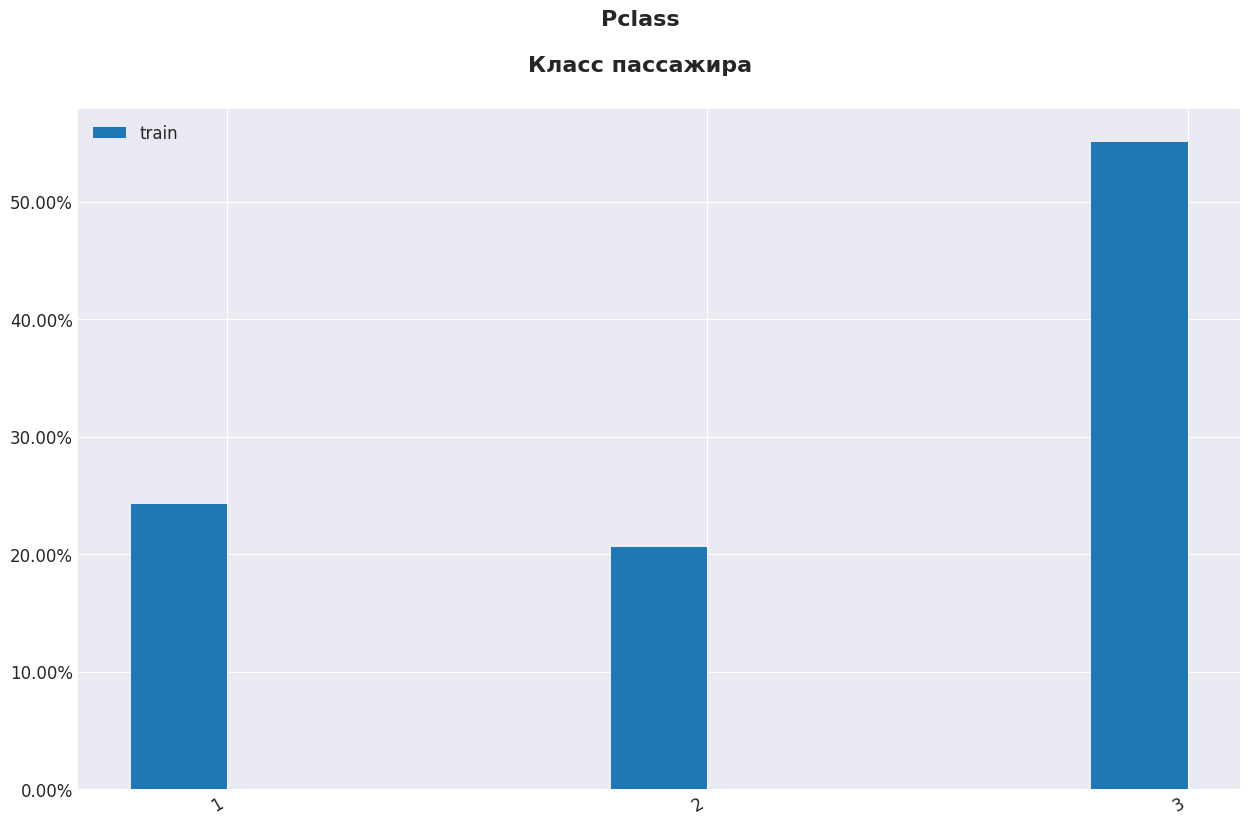

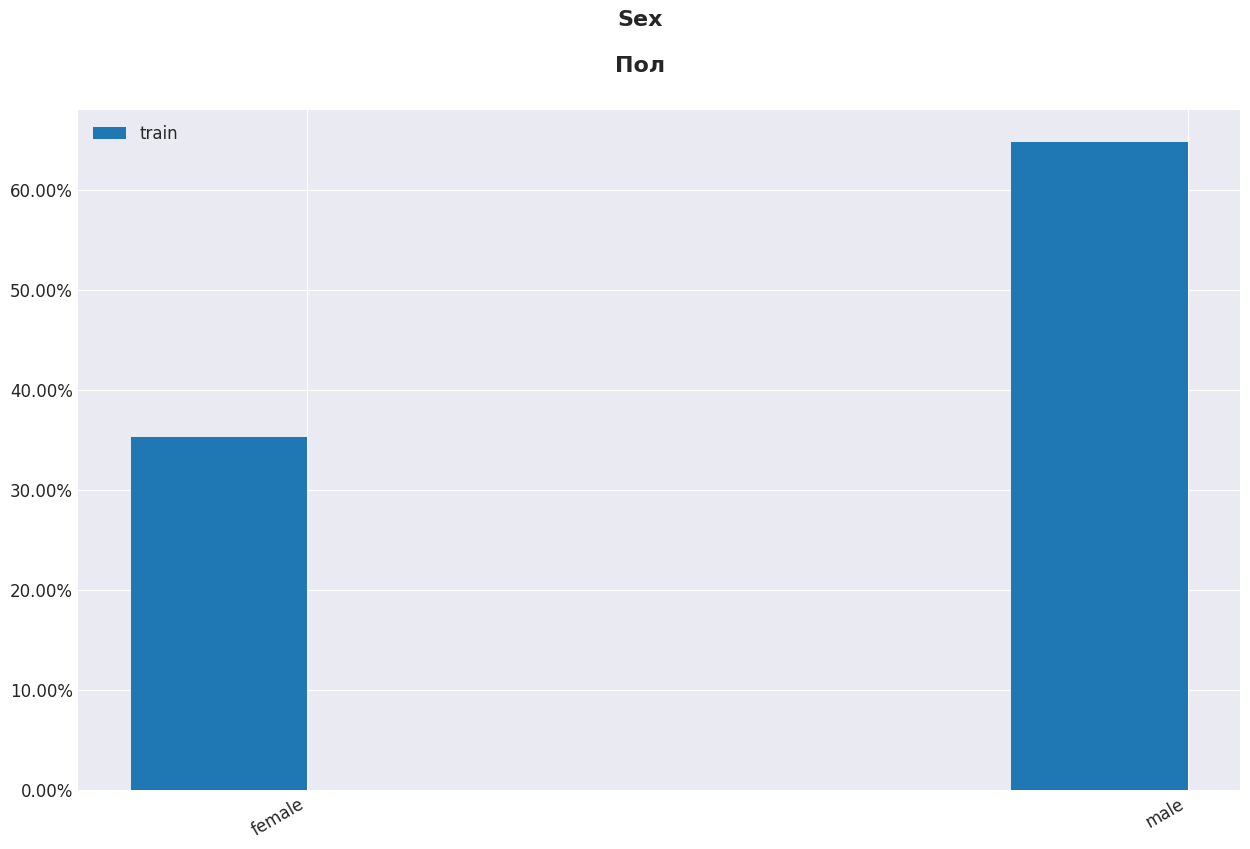

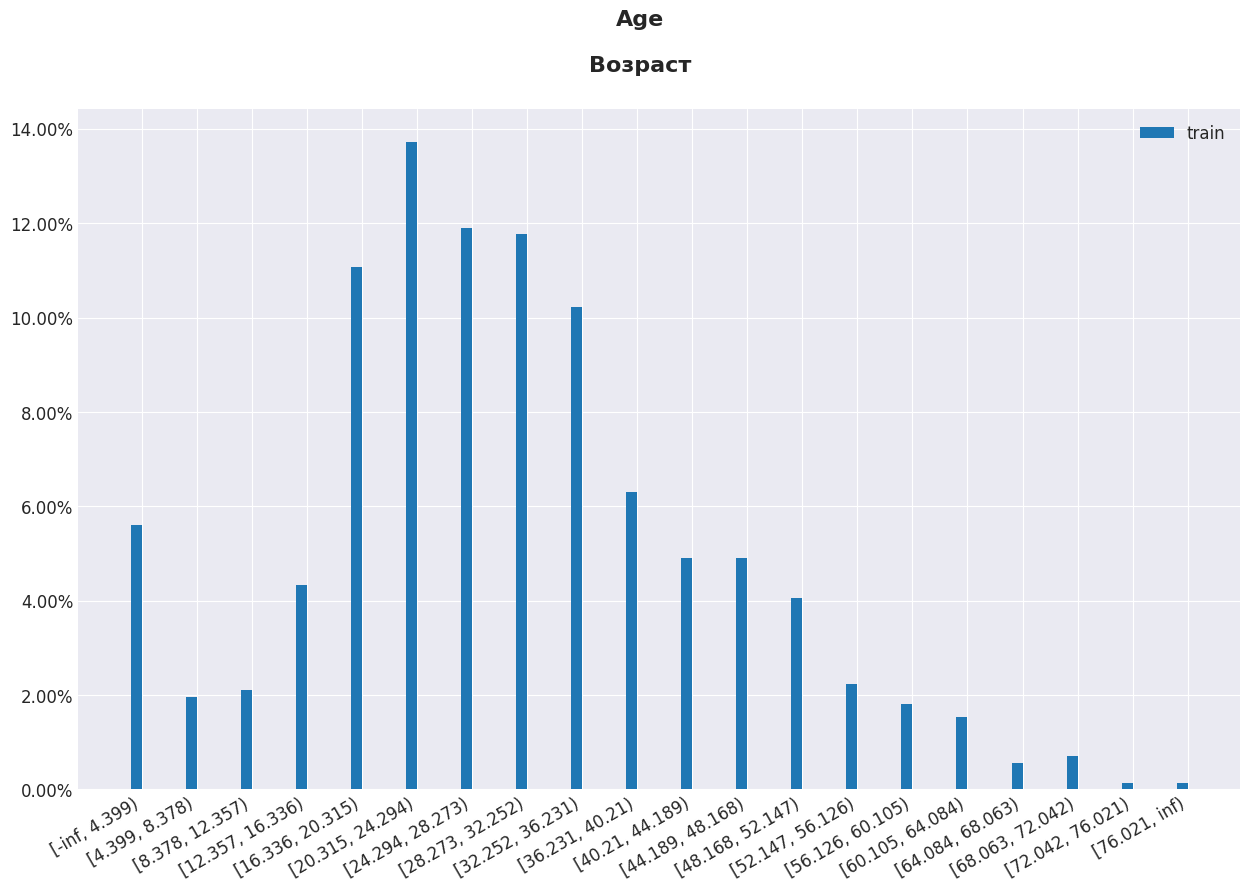

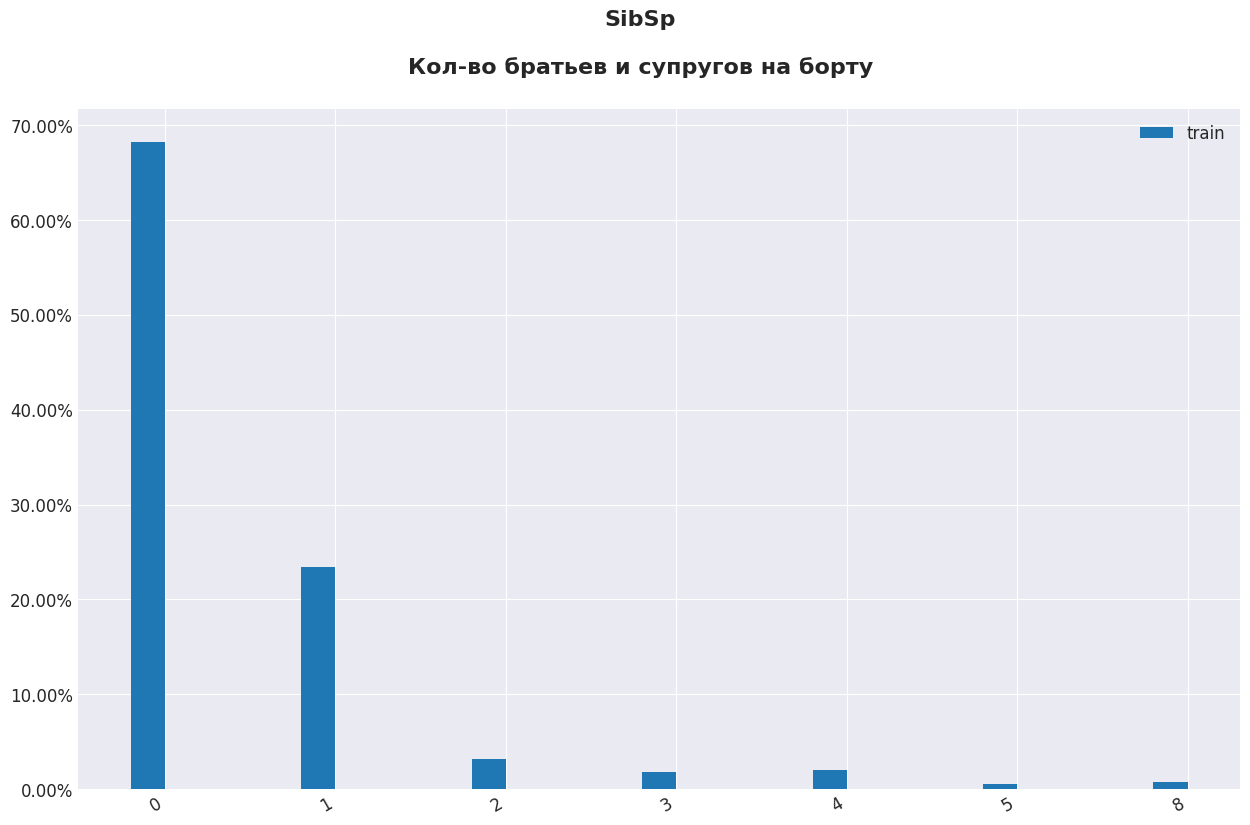

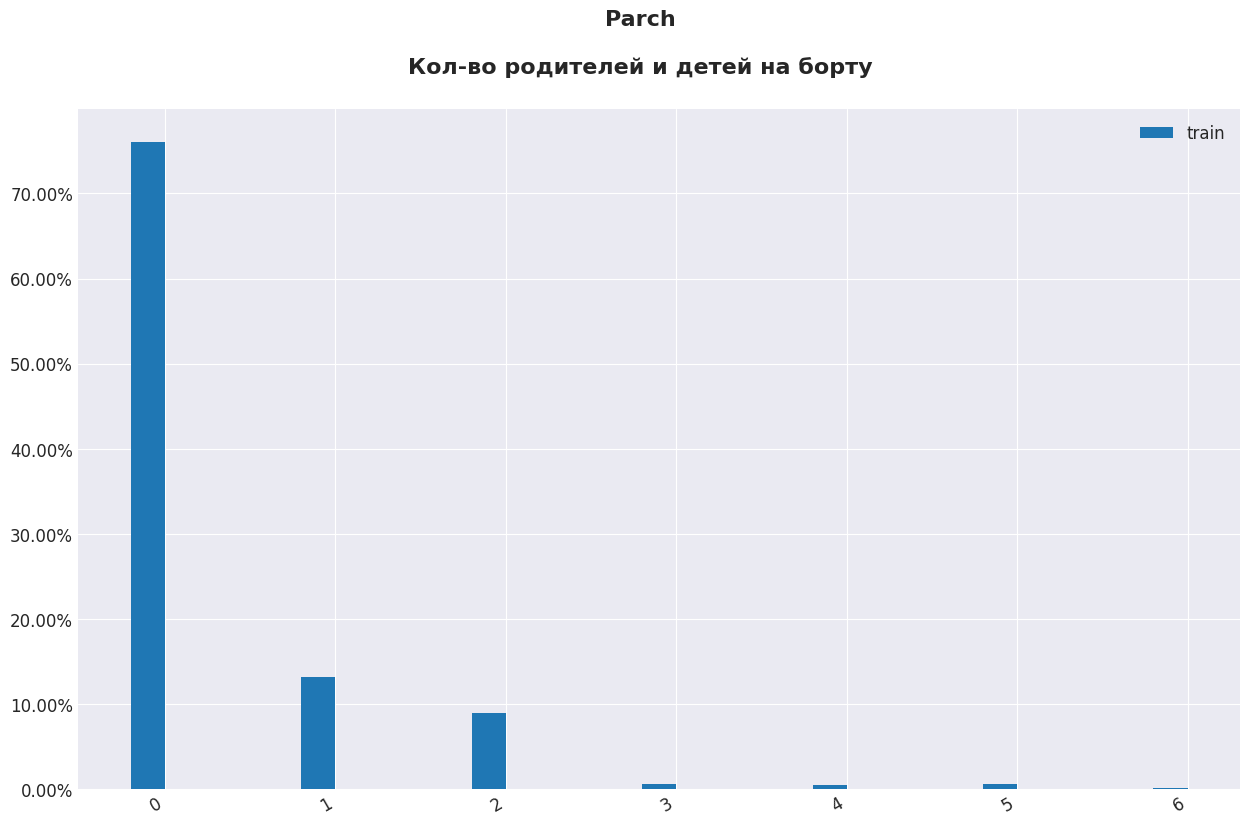

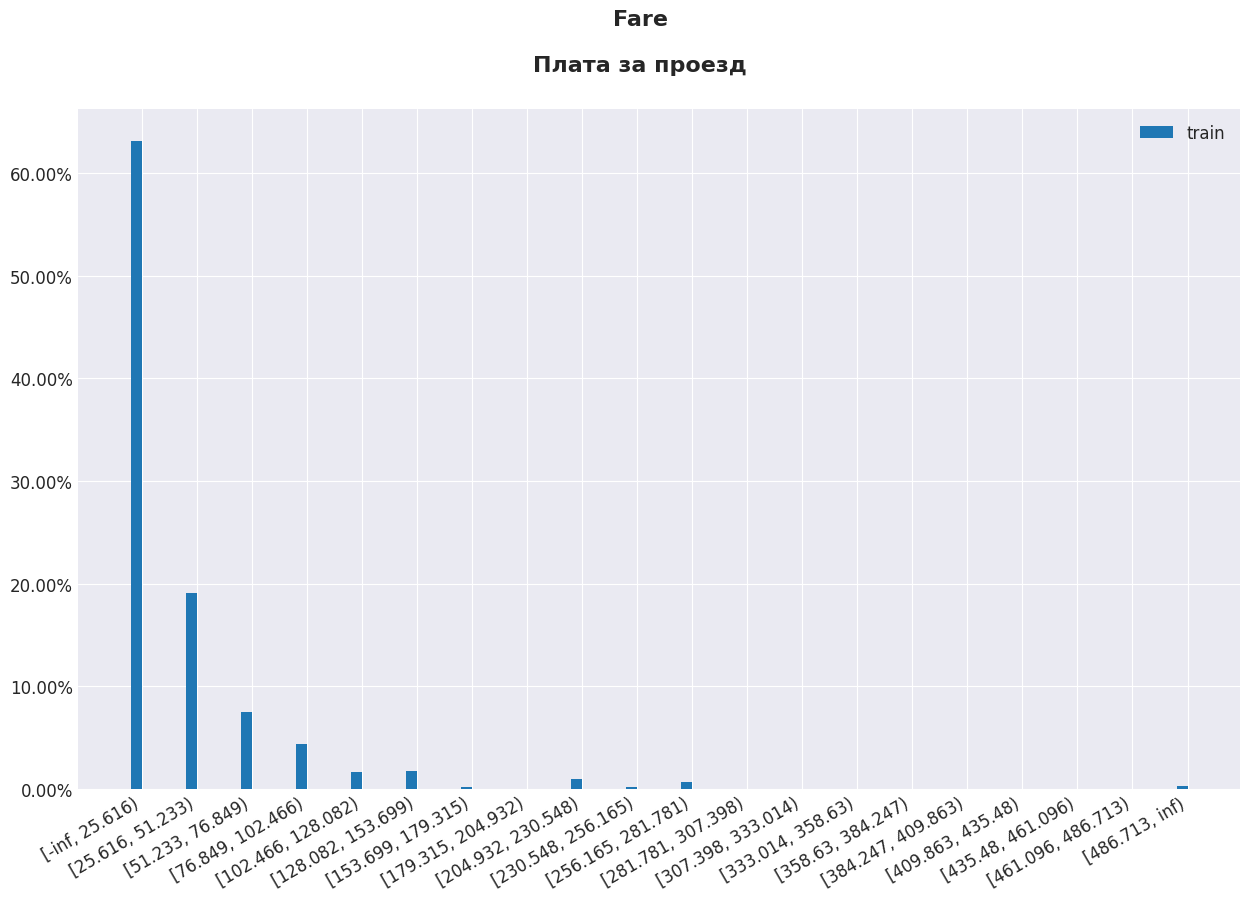

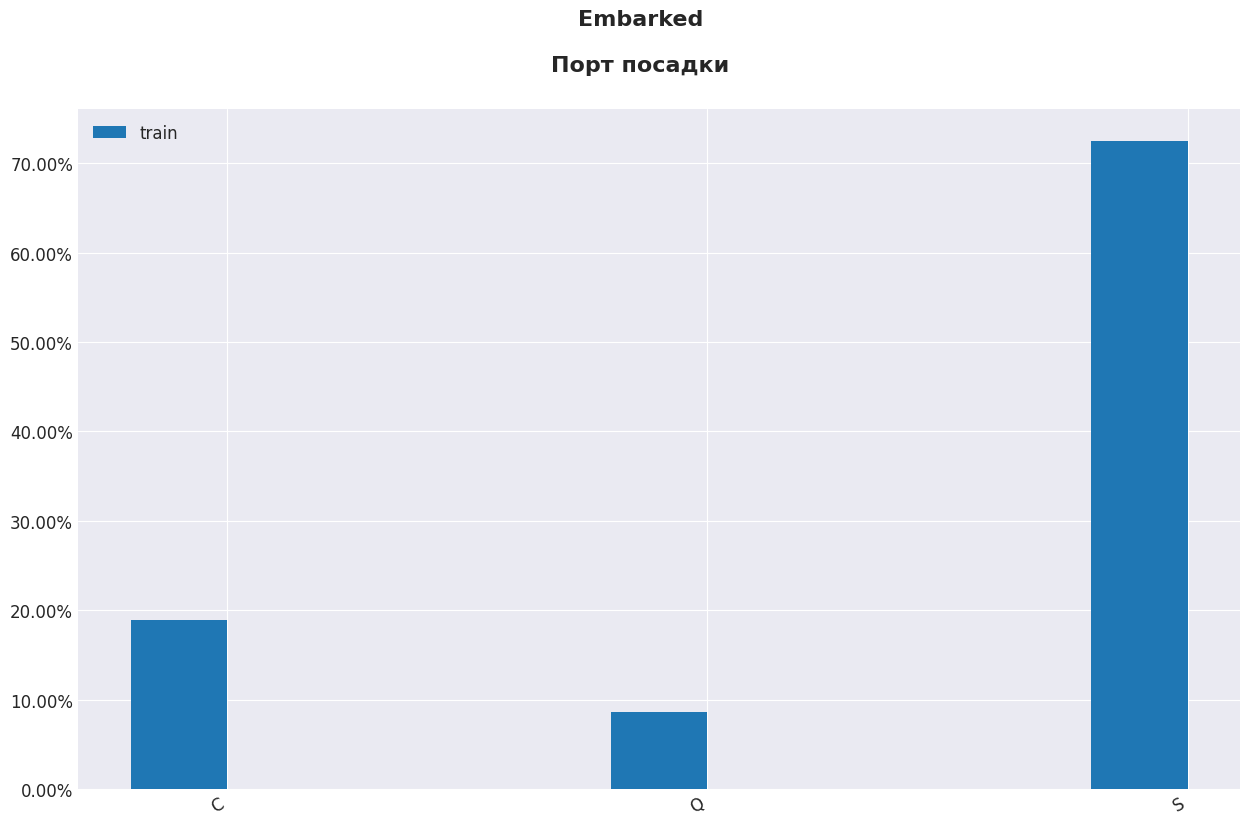

[<Figure size 1500x1000 with 1 Axes>,
 <Figure size 1500x1000 with 1 Axes>,
 <Figure size 1500x1000 with 1 Axes>,
 <Figure size 1500x1000 with 1 Axes>,
 <Figure size 1500x1000 with 1 Axes>,
 <Figure size 1500x1000 with 1 Axes>,
 <Figure size 1500x1000 with 1 Axes>]

In [22]:
"""
Отрисовка распределения значений переменной. Работает как с непрервными, так и дескретными переменными
:param features: список переменных для обработки
:param bins: кол-во бинов в распределении. Если в переменной число уникальных значений больше этого кол-ва, то она перебинивается
:param round_digits: кол-во знаков после запятой
:param plot_flag: флаг для вывода распределения

:return: список из графиков [plt.figure]
"""
ds.plot_distribution(features=None, bins=20, round_digits=3, plot_flag=True)

In [23]:
"""
Вычисление распределения таргета по каждой переменной из заданного списка
:param features: список переменных
:param quantiles: кол-во квантилей для разбиения непрерыных переменных
:param plot_flag: флаг для вывода распределения

:return: список из графиков [plt.figure]
"""
ds.targettrend(features=None, quantiles=100, plot_flag=False)

[<Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>]

In [24]:
"""
Разбивка датафрейма на сэмплы
:param df: датафрейм из которого нарезаются сэмплы. При None берется self.samples[self.train_name]
:param test_size: размер сэмпла test
:param validate_size: размер сэмпла validate
:param split_type: тип разбиения 'oos' = 'out-of-sample', 'oot' = 'out-of-time'
:param stratify: стратификация по целевой переменной. Только для split_type='oos'
:param id_column: название поля с айди. Если задано, то все одинаковые айди распределяются в один сэмпл,
                  в случае split_type='oot' из теста исключаются айди, присутсвующие в трэйне. Размер теста при этом может стать сильно меньше test_size
"""
ds.samples_split(df=None, test_size=.3, validate_size=0, split_type='oos', stratify=True, id_column=None)

Actual parts of samples:
train: 0.6992
Test: 0.3008


In [25]:
"""
Создание подвыборок для бутстрэпа
:param df: датафрейм, основа для нарезания подвыборок
:param bootstrap_part: размер каждой подвыборки
:param bootstrap_number: кол-во подвыборок
:param stratify: стратификация каждой подвыборки по целевой переменной
:param replace: разрешается ли повторять каждое наблюдение множество раз в подвыборке
"""
ds.bootstrap_split(df, bootstrap_part=0.75, bootstrap_number=10, stratify=True, replace=True)

In [26]:
"""
Корреляционный анализ переменных на выборке, формирование словаря переменных с причиной для исключения
:param sample_name: название сэмпла на котором проводится отбор. При None берется ds.train_sample
:param features: исходный список переменных для анализа. При None берется self.features
:param hold: список переменных, которые обязательно должны войти в модель
:param method: метод расчета корреляций. Доступны варианты 'pearson', 'kendall', 'spearman'
:param threshold: граница по коэффициенту корреляции
:param drop_with_most_correlations:  при True - итерационно исключается фактор с наибольшим кол-вом коррелирующих с ним факторов с корреляцией выше threshold
                                     при False - итерационно исключается фактор с наименьшим джини из списка коррелирующих факторов
:param verbose: флаг для вывода подробных комментариев в процессе работы

:return: словарь переменных для исключения вида {переменная: причина исключения}
"""
ds.CorrelationAnalyzer(sample_name=None, features=None, hold=None, method='pearson', threshold=0.6, drop_with_most_correlations=True, verbose=False)

{}

In [27]:
"""
Рассчет VIF для списка переменных
:param sample_name: название сэмпла на котором проводится расчет. При None берется ds.train_sample
:param features: список переменных для анализа. При None берется self.features

:return: ДатаФрейм с индексом из списка переменных и полем с расчитанным VIF
"""
ds.VIF(sample_name=None, features=None)

All features must be a numeric!
